In [1]:
import numpy as np
import pandas as pd
import graspologic as gs
import seaborn as sns
import matplotlib.pyplot as plt

from graspologic.embed import AdjacencySpectralEmbed as ASE
from graspologic.simulations import sbm
from graspologic.utils import remove_vertices
from graspologic.plot import pairplot, heatmap

In [2]:
P = np.array([[.8, .2], 
              [.2, .8]])
M = sbm([50, 50], P)
A, a = remove_vertices(M, indices=[0, -1], return_removed=True)

ase = ASE(n_components=2)
ase.fit(A)

fitted_latents = ase.latent_left_
predicted_latents = ase.predict(A)

### they're close but they're not on top of each other

In [3]:
np.allclose(fitted_latents, predicted_latents)

False

In [4]:
np.allclose(fitted_latents, predicted_latents, atol=1e-1)

True

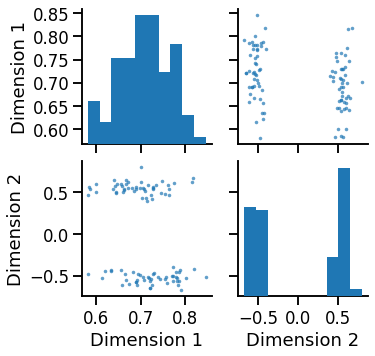

In [5]:
pairplot(fitted_latents)

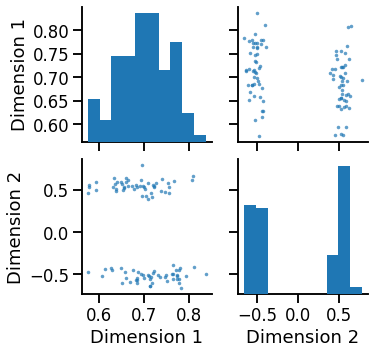

In [6]:
pairplot(predicted_latents)

In [7]:
fitted_latents_df = pd.DataFrame(fitted_latents, columns=["fit_x1", "fit_x2"])
predicted_latents_df = pd.DataFrame(predicted_latents, columns=["pred_x1", "pred_x2"])
pd.concat([fitted_latents_df, predicted_latents_df], axis='columns')

,fit_x1,fit_x2,pred_x1,pred_x2
0,0.680717,0.551370,0.673920,0.541929
1,0.638094,0.541005,0.632120,0.532321
2,0.711185,0.434313,0.703936,0.426722
3,0.708429,0.537832,0.701208,0.528431
4,0.715410,0.399582,0.707968,0.392455
...,...,...,...,...
93,0.779608,-0.455435,0.771012,-0.446825
94,0.785136,-0.610113,0.776479,-0.598578
95,0.664258,-0.477897,0.658039,-0.470225
96,0.759847,-0.594186,0.751627,-0.583164


### Make sure remove_vertices is doing what we think it is in the directed case

<AxesSubplot:>

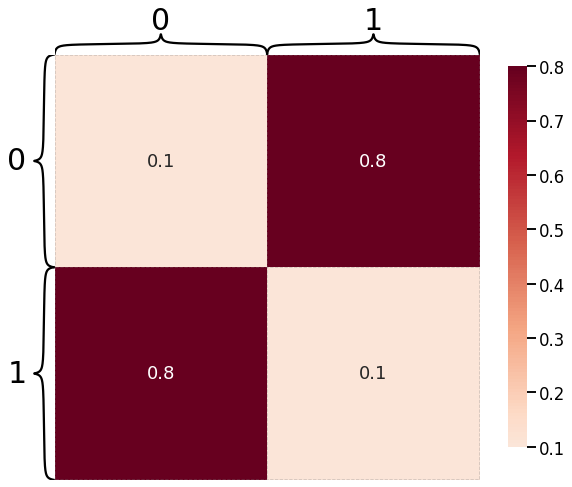

In [8]:
# B = np.array([[0.3, 0.1, 0.1], 
#               [0.3, 0.1, 0.1], 
#               [0.1, 0.5, 0.1]])


# B = np.array([[0.3, 0.1, 0.1], 
#               [0.3, 0.1, 0.1], 
#               [0.1, 0.5, 0.1]])

B = np.array([[.1, .8],
              [.8, .1]])

heatmap(B, annot=True, cmap="RdBu_r", center=0, inner_hier_labels=[0, 1])

In [35]:
%%capture
A, labels = gs.simulations.sbm([1000, 1000], B, return_labels=True, directed=True)
# indices = np.nonzero(np.r_[1, np.diff(labels)[:-1]])[0]
indices = [0, -1]
oos_labels = labels[indices]
labels = np.delete(labels, indices)

A, a = remove_vertices(A, indices, return_removed=True)  # one oos vertex for each community
ase = gs.embed.AdjacencySpectralEmbed(diag_aug=False, n_components=2)
out_latent, in_latent = ase.fit_transform(A)
pred_out, pred_in = ase.predict(a)


# out dataframes
out_oos_df = gs.plot.pairplot(pred_out, labels=oos_labels).data

# in dataframes
in_oos_df = gs.plot.pairplot(pred_in, labels=oos_labels).data

In [36]:
pred_in

array([[ 0.66548136, -0.59312911],
       [ 0.67704468,  0.60234373]])

In [38]:
in_latent

array([[ 0.65402082,  0.600192  ],
       [ 0.67799147,  0.59464602],
       [ 0.65833554,  0.56907599],
       ...,
       [ 0.67180216, -0.59607904],
       [ 0.69119287, -0.57778648],
       [ 0.67455582, -0.58424813]])

In [26]:
in_latent_df

,Type,0,1
0,0,0.682032,0.622779
1,0,0.674823,0.575259
2,0,0.652486,0.570194
3,0,0.685948,0.596505
4,0,0.666510,0.572579
...,...,...,...
1993,1,0.657841,-0.617728
1994,1,0.673194,-0.581653
1995,1,0.663091,-0.586988
1996,1,0.678076,-0.562095


In [27]:
in_oos_df

,Type,Dimension 1,Dimension 2
0,0,0.673208,-0.572400
1,1,0.676346,0.586091


      Type         0         1
0        0  0.682032  0.622779
1        0  0.674823  0.575259
2        0  0.652486  0.570194
3        0  0.685948  0.596505
4        0  0.666510  0.572579
...    ...       ...       ...
1993     1  0.657841 -0.617728
1994     1  0.673194 -0.581653
1995     1  0.663091 -0.586988
1996     1  0.678076 -0.562095
1997     1  0.652798 -0.596473

[1998 rows x 3 columns]
   Type         0         1
0     0  0.673208 -0.572400
1     1  0.676346  0.586091


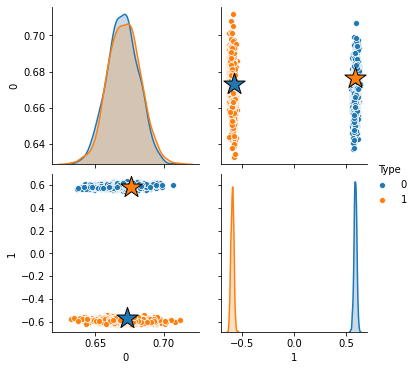

In [33]:
# Plot the data
df_labels = pd.DataFrame(labels, columns=["Type"])
oos_labels = pd.DataFrame(oos_labels, columns=["Type"])

in_latent_df = pd.concat([df_labels, pd.DataFrame(in_latent)], axis=1)
in_oos_df = pd.concat([oos_labels, pd.DataFrame(pred_in)], axis=1)

g = sns.pairplot(in_latent_df, hue="Type")
print(g.data)

# Change the PairGrid dataset and add a new layer
g.data = in_oos_df
print(g.data)
g.hue_vals = in_oos_df["Type"]
g.map_offdiag(plt.scatter, s=500, marker="*", edgecolor="black")

# # Plot the data
# g = sns.pairplot(out_latent, labels=labels)

# # Change the PairGrid dataset and add a new layer
# g.data = out_oos_df
# g.hue_vals = out_oos_df["Type"]
# g.map_offdiag(plt.scatter, s=500, marker="*", edgecolor="black")